# Predecting if patients will miss their scheduled appointments or not.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> Description of all features and the data itself is [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

> Some of them:
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions for Analysis we need to answer.
* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

1. Is there any relationship between showing up and the **gender**?
2. Is there any relationship between showing up and the **age**?
3. What is the most disease between **Hipertension** and **Diabetes** affect the absence of the patiente?
4. Is the location of the hospital affect the absence of the patients?

6. Do Receiving messages have an effect on comming to the appointment? 

In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [757]:
def PlotBars(label1, height1, label2, height2, col1='r', col2='b', Titel='Titel', yLabel='Number of patients', xLabel=''):
    sns.set()
    fig, ax = plt.subplots()
    ax.bar(label1, height1, label=label1, color=col1)
    ax.bar(label2, height2, label=label2, color=col2)
    ax.set_title(Titel, fontweight='bold')
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    ax.legend()
    
def PlotPies(column, Labels, Title):
    sns.set()
    fig = plt.figure(figsize =(10, 7))
    plt.pie(df[column].value_counts().values, labels=Labels, colors=['#234E70', 'r'], autopct='%.0f%%', textprops={'color':"w"})
    plt.legend()
    plt.title(Title)
    plt.show()

<a id='wrangling'></a>
## Data Wrangling


### Assessing and Building Intuition

In [648]:
df.shape

(110527, 14)

There are 14 columns and 110527 rows in the dataset.

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> * ScheduledDay & AppointmentDay are objects not DayTime.
> * No-show column's data types need to be integers to help us make statistic operations on it.

In [650]:
# This shows the number of unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> * The number of unique appointments > patients .. thats mean many patients have more than one appointment.
>
> * There are 5 values in Handcap column, but it should be only 0 & 1.

In [651]:
# The Descriptive statistics for each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> * Avg age of the patients is 37 years old.
> * The oldest patient has 115 years old.
> * There are not many patients have Diabetes, Alcoholism or Handcap.
> * Less than the half of the sms messages are received.

In [652]:
# Number of null values.
df.isnull().sum().sum()

0

There is no null values in the dataset.

> Info about **Age** column.

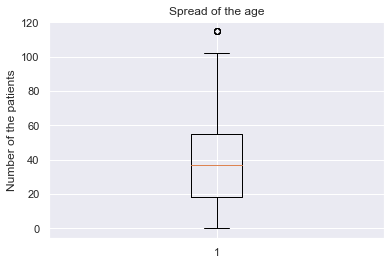

In [754]:
# Getting statistical informations about age column.
sns.set()
fig, ax = plt.subplots()
ax.boxplot(df['Age']);
ax.set_title('Spread of the age');
ax.set_ylabel('Number of the patients');

* There is an outlier when the patient has about 119 years old.

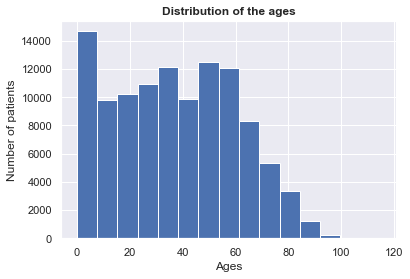

In [756]:
fig, ax = plt.subplots()
ax.hist(df['Age'], bins=15)
ax.set_xlabel("Ages")
ax.set_title('Distribution of the ages', fontweight='bold');
ax.set_ylabel('Number of patients');

* The age state that has the maximum number of patients is Infants.
* We will classify the ages by groups.

> Info about **Gender** column.

In [758]:
Data = df['Gender'].value_counts()
Data

F    71839
M    38687
Name: Gender, dtype: int64

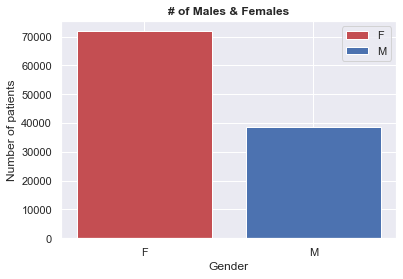

In [759]:
PlotBars(label1=Data.index[0], height1=Data.values[0], label2=Data.index[1], height2=Data.values[1], Titel='# of Males & Females', xLabel='Gender')

* There are more than 70,000 female patients.
* There are less than 40,000 male patients.
* There are a number of female patients about double the number of the male patients

Text(0, 0.5, 'Number of appointments')

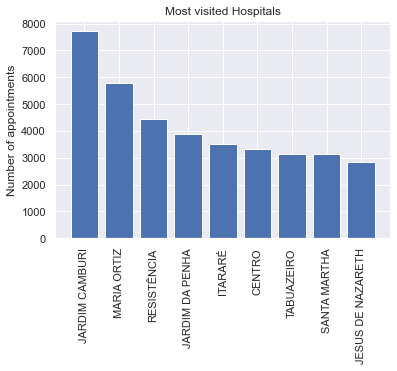

In [760]:
most_visited_hospitals = df.Neighbourhood.value_counts()[0: 9]
names = most_visited_hospitals.index
sns.set()
fig, ax = plt.subplots()
ax.bar(most_visited_hospitals.index, most_visited_hospitals.values);
plt.xticks(rotation=90);
ax.set_title('Most visited Hospitals')
ax.set_ylabel('Number of appointments')

> Info about **Scholarship** column.

In [761]:
Data = df['Scholarship'].value_counts()
Data

0    99665
1    10861
Name: Scholarship, dtype: int64

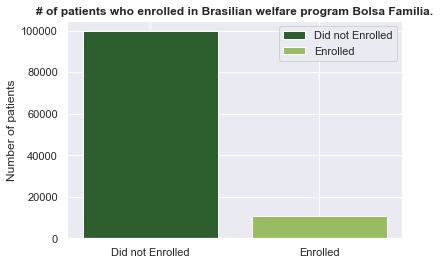

In [762]:
PlotBars(label1='Did not Enrolled', height1=Data.values[0], label2='Enrolled', height2=Data.values[1], Titel="# of patients who enrolled in Brasilian welfare program Bolsa Família.", col1='#2C5F2D', col2='#97BC62FF')

* There are about 100,000 patients who did not enrolled the Brasilian welfare praogram Bolsa Familia.
* There are about 10,000  patients who enrolled.

> Info about **Hipertension** column.

In [763]:
Data = df['Hipertension'].value_counts()
Data

0    88725
1    21801
Name: Hipertension, dtype: int64

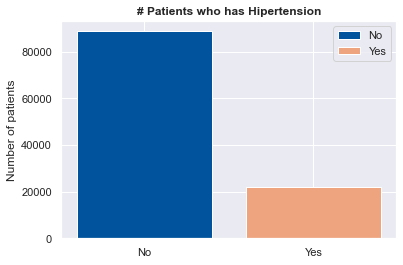

In [764]:
PlotBars(label1='No', height1=Data.values[0], label2='Yes', height2=Data.values[1], Titel="# Patients who has Hipertension", col1='#00539CFF', col2='#EEA47FFF')

* Most of patients does not have Hipertension.

> Info about **Diabetes** column.

In [765]:
Data = df['Diabetes'].value_counts()
Data

0    102583
1      7943
Name: Diabetes, dtype: int64

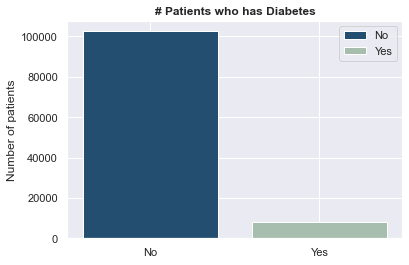

In [767]:
PlotBars(label1='No', height1=Data.values[0], label2='Yes', height2=Data.values[1], Titel="# Patients who has Diabetes", col1='#234E70', col2='#A7BEAE')

* About 102,000 patients do not have diabetes.
* Less than 10,000 patients do.

> Info about **Alcoholism** column.

In [768]:
Data = df['Alcoholism'].value_counts()
Data

0    107166
1      3360
Name: Alcoholism, dtype: int64

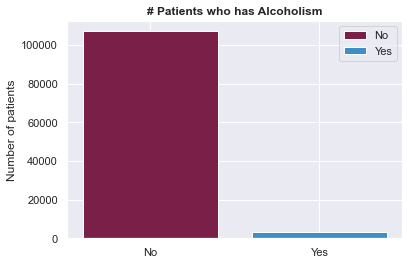

In [769]:
PlotBars(label1='No', height1=Data.values[0], label2='Yes', height2=Data.values[1], Titel="# Patients who has Alcoholism", col1='#7A2048', col2='#408EC6')

* About 107,000 patients do not have Alcoholism.
* Less than 3,500 patients do.

> Info about **SMS_received** column.

In [770]:
Data = df['SMS_received'].value_counts()
Data

0    75044
1    35482
Name: SMS_received, dtype: int64

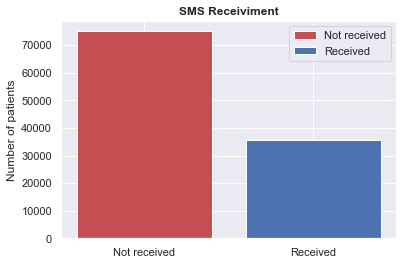

In [771]:
PlotBars(label1='Not received', height1=Data.values[0], label2='Received', height2=Data.values[1], Titel="SMS Receiviment")

> * More than 75,000 sms messages did not recieved.
> * About 35,000 sms messages recieved.

In [ ]:
Data = df['No-show'].value_counts()
Data

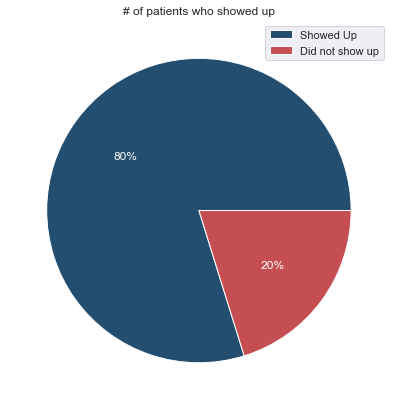

In [669]:
PlotPies(column='No-show', Labels=['Showed Up', 'Did not show up'], Title='# of patients who showed up')

* There are 80% of patients showed up.


### Data Cleaning

> Cleaning and Editing **ScheduledDay & AppointmentDay** columns.

In [775]:
# Making the data type of ScheduledDay & AppointmentDay => DateTime data type.

# converting column from object -> datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [ ]:
# calculating the difference between the 2 days using only dates not hours.
Waiting = df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date
Waiting = Waiting.dt.days

# To inserting them in the first columns not to change the No-how column's position.
df.insert(5, 'Waiting', Waiting)

df.Waiting.value_counts().plot(figsize=(8, 4));
plt.xlabel('Number of dayes between Appointment day & Scheduled Day', fontsize=12);
plt.ylabel('Number of appointments', fontsize=12);

* Most appointments are done on their scheduled days but there are few appointments that are done after the scheduled day and before it.

In [ ]:
# making 2 columns for the days of the appointment day & sceduled day.
Appointment_Day = df.AppointmentDay.dt.day_name()
df.insert(5, 'Appointment_Day', Appointment_Day)

Scheduled_Day = df.ScheduledDay.dt.day_name()
df.insert(5, 'Scheduled_Day', Scheduled_Day)

> Cleaning and Editing **No-show** column.

In [673]:
# changing the column name to be 'No_show' instead of 'NO-show'
df.rename(columns={'No-show': 'No_show'}, inplace=True)

In [674]:
# changing each No => 0 & Yes => 1
df['No_show'] = df['No_show'].apply(lambda val: 0 if val == 'No' else 1)

> Cleaning and Editign **Age** column.

In [675]:
# Ignoring any invalid ages' rows.
df = df[df['Age'] >= 0]

In [676]:
# Making ages in groubs ['0:5', '6:9', '10:17', '18:34', '35:54', '55:74', '74+']

maximum_age = df.Age.max()
labels = ['0:5', '6:9', '10:17', '18:34', '35:54', '55:74', '74+']
bins = [0, 5, 9, 17, 34, 54, 74, maximum_age]

Age_stage = pd.cut(df['Age'], bins=bins, labels=labels)
df.insert(9, 'Age_stage', Age_stage)


> Cleaning and Editing **Handcap** column.

In [677]:
# Ignoring all values that not in [0, 1]
df['Handcap'] = df.query('Handcap in [0, 1]')['Handcap']
df['Handcap'].value_counts()

0.0    108285
1.0      2042
Name: Handcap, dtype: int64

* Now there are no values in the Handcap column except 0 & 1.

<a id='eda'></a>
## Exploratory Data Analysis

### Is there any relationship between showing up and the gender?

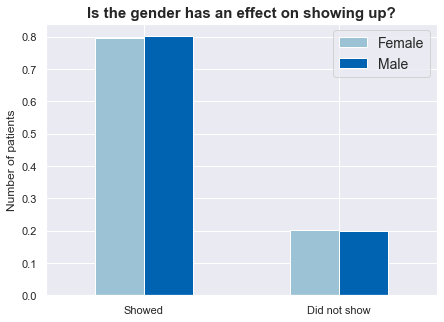

In [740]:
# Total number of each gender who showed up and did not.
Patients_show_not = df.groupby(['No_show', 'Gender'])['PatientId'].count()

# Total number of patients in each gender.
numOfPatients = df.groupby('Gender')['PatientId'].count()

# We divide number of patients who showed up in female for ex
# by the total number of female ... etc.
propotions = Patients_show_not / numOfPatients

propotions.unstack().plot(kind='bar', color=['#9CC3D5FF', '#0063B2FF'], ylabel='Number of patients', figsize=(7, 5));
plt.title('Is the gender has an effect on showing up?', fontweight='bold', fontsize=15)
plt.legend(labels=['Female', 'Male'], fontsize=14);
plt.xticks([0, 1], ['Showed', 'Did not show'], rotation=0);
plt.xlabel('');

* As we know from assessing data on the section of gender,\
    the number of females is about the double of the number of males.\
    We will take proportions to be fair.

> We get that **Gender does not have an effect on showing up or not**.

### Is there any relationship between showing up and the Age?

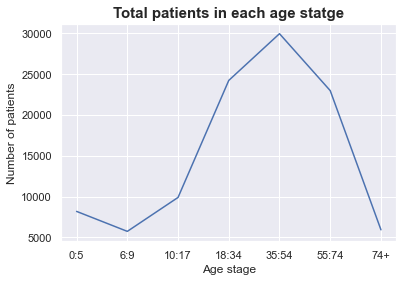

In [688]:
Total_patients_inStatges = df.groupby('Age_stage')['No_show'].count()

plt.plot(Total_patients_inStatge);
plt.title('Total patients in each age statge', fontsize=15, fontweight='bold');
plt.xlabel('Age stage', fontsize=12);
plt.ylabel('Number of patients', fontsize=12);


* We notice that the age stage that has the most number of patients is 35 to 54 years.
* Because of that change in the number of patients in each stage we will make analysis on proportions, not values.

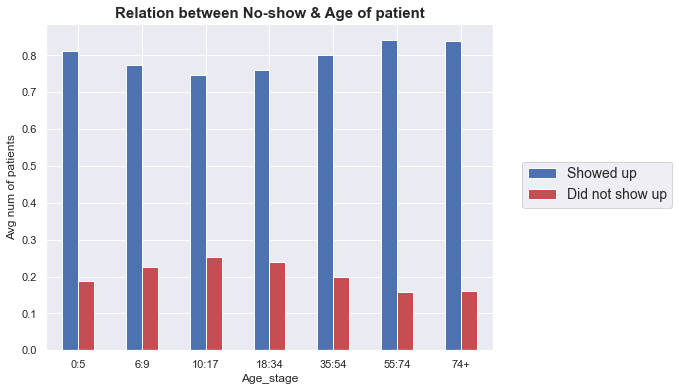

In [753]:
# Each age stage with its showed up patients and who didn't
NoShow_ageStage = df.groupby(['Age_stage', 'No_show'])['PatientId'].count()

propotions = NoShow_ageStage / Total_patients_inStatges

propotions.unstack().plot.bar(color=['b', 'r'], figsize=(8, 6));

plt.ylabel('Avg num of patients')
plt.title('Relation between No-show & Age of patient', fontsize=15, fontweight='bold')
plt.xticks(rotation=0);
plt.legend(labels=['Showed up', 'Did not show up'], fontsize=14, bbox_to_anchor=(1.05, 0.6));

> Most people who showed up in Descending order from the age statges:
>    1. 55 to 74 years old.
>    2. more than 74 years old.
>    3. 0 to 5 years old.
    
    
> Most people who Did not show up in Descending order from the age statges:
>    1. 10 to 17 years old.
>    2. 18 to 34 years old. 

Text(0, 0.5, 'Avg of patients who showed up')

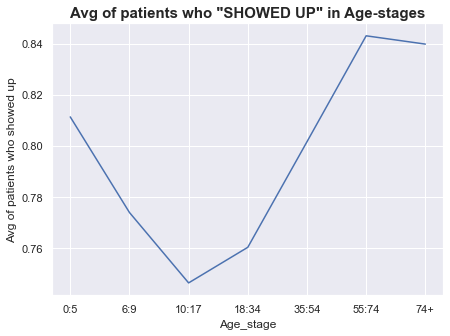

In [741]:
Total_patients_showed_inStage = df.query('No_show == 0').groupby('Age_stage')['PatientId'].count()
propotions = Total_patients_showed_inStage / Total_patients_inStatges
propotions.plot(color='b', figsize=(7, 5));
plt.title('Avg of patients who "SHOWED UP" in Age-stages', fontsize=15, fontweight='bold');
plt.ylabel('Avg of patients who showed up')

* We can notice that in the young and old age stages, attendance increases\
and decreases dramatically in the middle age stages. As we see that decrease\
from The stage 6 to 9 years till it began to increase at the stage of 35 to 54 till the end.

> **So, there is a relationship between the age stage and the showing up!**

### Do Receiving messages have an effect on comming to the appointment? 


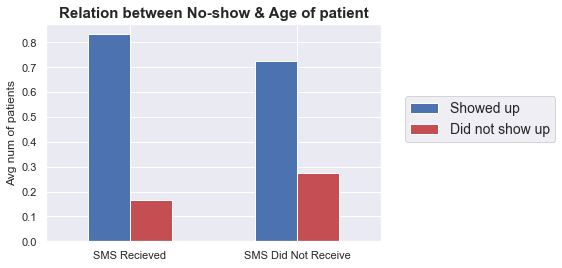

In [779]:
# As we know that most patients didn't recived SMS. So, we will take propotions.
Total_messages = df.groupby(['SMS_received'])['No_show'].count()
messages_received_notRec = df.groupby(['SMS_received', 'No_show'])['No_show'].count()
propotions = messages_received_notRec / Total_messages

propotions.unstack().plot(kind='bar', color=['b', 'r']);
plt.ylabel('Avg num of patients')
plt.xlabel('');
plt.title('Relation between No-show & Age of patient', fontsize=15, fontweight='bold')
plt.legend(labels=['Showed up', 'Did not show up'], fontsize=14, bbox_to_anchor=(1.05, 0.7));
plt.xticks([0, 1], ['SMS Recieved', "SMS Did Not Receive"], rotation=0);


> * Patients who received the SMS showed up more than those who did not receive it.
> * But there are also patients who showed up however they did not receive an SMS.

> **So, receiving SMS helps in making patients come but not receiving it does not affect strongly showing up**

<a id='conclusions'></a>
## Conclusions